In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("clothes_size.csv")

In [47]:
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [48]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [51]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [52]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [53]:
encode = {"size":{"XXS": 0, "XS": 1, "S":2, "M":3, "L":4, "XL":5, "XXL":6, "XXXL":7}}

In [54]:
df = df.replace(encode)

In [55]:
df

,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3
...,...,...,...,...
119729,63,42.0,175.26,3
119730,45,29.0,154.94,2
119731,61,31.0,172.72,3
119732,74,31.0,167.64,5


In [56]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.cbook import boxplot_stats

# plt.figure(figsize=(100, 100))
# f, axes = plt.subplots(1, 2)
# sns.boxplot(data = df, y ="height", palette="husl", ax = axes[0])
# sns.boxplot(data = df, y ="weight", palette="husl", ax = axes[1])

In [57]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['size']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [58]:
models = ['KNN','Random Forest','SVM','Naive Bayes']
acc = []

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
acc.append(accuracy_score(y_test,y_knn_pred))

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_rf_pred = rf_model.predict(X_test)
acc.append(accuracy_score(y_test,y_rf_pred))

In [62]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)
y_svm_pred = svm_model.predict(X_test)
acc.append(accuracy_score(y_test,y_svm_pred))

In [63]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
acc.append(accuracy_score(y_test,y_nb_pred))

<BarContainer object of 4 artists>

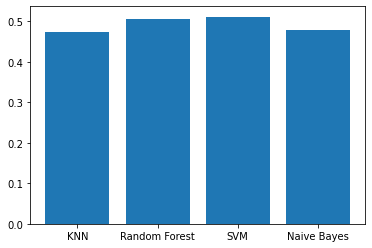

In [64]:
import matplotlib.pyplot as plt
plt.bar(x=models,height=acc)

In [67]:
best_acc = max(acc)
models[acc.index(best_acc)]

'SVM'

In [71]:
pd.DataFrame(data=zip(models,acc), columns=['ML Algorithm','Accuracy'])

,ML Algorithm,Accuracy
0,KNN,0.473983
1,Random Forest,0.506910
2,SVM,0.511806
3,Naive Bayes,0.478207
